<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0420_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기 및 간단한 전처리

In [1]:
#필요한 라이브러리

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

wine=load_wine()
wine        

#어떠한 데이터인지 확인 data , feature_names ,target, target_names 

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [2]:
df=pd.DataFrame(data = wine['data'],columns = wine['feature_names'])  #df에 wine의 feature_names를 컬럼으로 wine의 data을 data값으로 불러옴
df['target']=wine.target # target이라는 컬럼을 새로 만든다.
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
#우리가 구하고자 하는것은 이진분류이므로, 이번에는 0과 1을 남기고 2를 삭제해보겠다.

not2=df['target'].isin([0,1])   #not2라는 변수에 df['target'].isin([0,1])을 하면 0과1은 True 2는False값으로 저장
df=df[not2]                     #이것을 df로 다시 묶어주면 True인 0과 1의 target값만 남게된다.
df          

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [4]:
#더 좋은 결과값을 위해서 정규화를 해줌

standard_df=df
standard_df=standard_df.apply(lambda x: (x-x.mean())/x.std())
standard_df['target']=df['target']      #위의식으로 인해 target값까지 정규화 되었으므로 target값은 df['target']으로 재설정
standard_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.446858,-0.293280,0.301312,-0.936752,1.761871,0.508454,0.772603,-0.460466,0.996374,0.888945,-0.111994,2.032163,0.779851,0
1,0.287952,-0.213731,-0.674587,-2.230695,0.006501,0.233424,0.365970,-0.643806,-0.875481,0.113933,-0.052714,0.937809,0.737300,0
2,0.242946,0.445383,1.108952,-0.054518,0.071515,0.508454,1.016583,-0.277126,1.960101,0.913548,-0.171275,0.453768,1.120264,0
3,1.604379,-0.020543,0.536874,-0.583858,0.851679,2.433670,1.355445,-0.827146,0.792509,2.217536,-1.179042,1.043036,1.957113,0
4,0.332958,0.706756,1.781986,0.651270,1.176748,0.508454,0.271089,0.547905,0.125313,0.077028,-0.111994,-0.051318,-0.156284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.983469,0.218102,-0.573632,0.651270,-0.968704,0.141747,0.216871,0.364565,-0.745748,-0.882510,-1.179042,0.685266,-1.169013,1
126,-0.578414,-0.497833,-0.169812,0.798309,-0.903690,0.398442,0.894593,0.547905,0.032647,-0.156706,-2.186808,-0.240725,-1.242769,1
127,-1.298511,0.184010,1.479121,2.856855,-0.513608,-0.720017,-0.338861,2.289636,0.014114,-0.734889,-0.526957,-1.082536,-0.919377,1
128,-0.645923,-0.384192,-0.136160,1.680543,-0.773663,-0.554998,-0.054218,0.639575,0.273579,-1.276167,-1.001200,-0.366997,-1.271137,1


In [5]:
#x,y에 정규화된 값들을 저장 

x,y=standard_df.values[:,:-1],standard_df.values[:,-1:]
x.shape,y.shape #input 13 output 1

((130, 13), (130, 1))

커스텀 데이터셋 만들기

In [0]:
#파이토치로 로지스틱 리그레션(이진분류) 구현하기

#필요 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [7]:
torch.manual_seed(1)

In [0]:
#커스텀 데이터셋 만들때 항상필요....

class Wine():
    def __init__(self):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.x_data)
  
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y
    

In [9]:
dataset=Wine()

train_val_ratio=0.8
train_size=int(len(dataset)*train_val_ratio)
val_size=len(dataset)-train_size
print(train_size,val_size)


train_dataset, val_dataset = torch.utils.data.random_split(dataset,[train_size,val_size])
print(len(train_dataset), len(val_dataset))

104 26
104 26


In [10]:
dataset[0]  #0번쨰샘플의 x는 1.4469, -0.2933,  0.3013, -0.9368,  1.7619,  0.5085,  0.7726, -0.4605, 0.9964,  0.8889, -0.1120,  2.0322,  0.7799,  y는 0

(tensor([ 1.4469, -0.2933,  0.3013, -0.9368,  1.7619,  0.5085,  0.7726, -0.4605,
          0.9964,  0.8889, -0.1120,  2.0322,  0.7799]), tensor([0.]))

In [0]:
train_loader=DataLoader(dataset=train_dataset,batch_size=len(dataset),shuffle=True) 
val_loader=DataLoader(dataset=val_dataset,batch_size=len(dataset),shuffle=True) 

In [0]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(13,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        return self.sigmoid(self.linear(x)) #선형회귀 되어 나온값에 시그모이드를 씌워준다.

모델 학습하기

In [13]:
model=BinaryClassifier()
print(list(model.parameters())) #초기화된 w,b값 확인
optimizer = optim.SGD(model.parameters(), lr=0.01)

[Parameter containing:
tensor([[ 0.2575, -0.1722,  0.0602,  0.2393,  0.1838,  0.1729,  0.1971,  0.1754,
          0.0716, -0.1897, -0.2329, -0.1271, -0.0323]], requires_grad=True), Parameter containing:
tensor([-0.1700], requires_grad=True)]


In [14]:
#validataion set 나누니 확실히 cost가 줄어든다.

nb_epochs=2000
train_losses=[]
val_losses = []

for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(train_loader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Train Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(train_loader),
            cost.item()
             ))
            
    for batch_idx, samples in enumerate(val_loader):
        x_val, y_val = samples

        prediction = model(x_val)
        cost = F.mse_loss(prediction, y_val)

        val_losses.append(cost.item())

        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Validation Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(val_loader),
            cost.item()
             ))
            print('-'*50)

Epoch    0/2000 Batch 1/1 Train Cost: 0.294952
Epoch    0/2000 Batch 1/1 Validation Cost: 0.317359
--------------------------------------------------
Epoch  100/2000 Batch 1/1 Train Cost: 0.153109
Epoch  100/2000 Batch 1/1 Validation Cost: 0.157749
--------------------------------------------------
Epoch  200/2000 Batch 1/1 Train Cost: 0.102505
Epoch  200/2000 Batch 1/1 Validation Cost: 0.099455
--------------------------------------------------
Epoch  300/2000 Batch 1/1 Train Cost: 0.079221
Epoch  300/2000 Batch 1/1 Validation Cost: 0.073330
--------------------------------------------------
Epoch  400/2000 Batch 1/1 Train Cost: 0.065716
Epoch  400/2000 Batch 1/1 Validation Cost: 0.058921
--------------------------------------------------
Epoch  500/2000 Batch 1/1 Train Cost: 0.056749
Epoch  500/2000 Batch 1/1 Validation Cost: 0.049859
--------------------------------------------------
Epoch  600/2000 Batch 1/1 Train Cost: 0.050283
Epoch  600/2000 Batch 1/1 Validation Cost: 0.043647
-

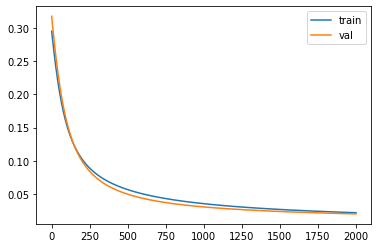

In [15]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

예측하기

In [0]:
#잠깐 근데 x_test값은 어떻게 나누지???

[Parameter containing:
tensor([[-0.5752, -0.3157, -0.5022,  0.6147, -0.0816, -0.0113, -0.0959,  0.1651,
          0.0327, -0.7521, -0.0668, -0.3459, -0.8622]], requires_grad=True), Parameter containing:
tensor([0.0978], requires_grad=True)]


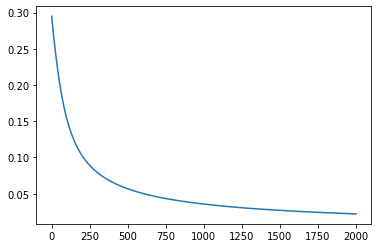

In [17]:
print(list(model.parameters())) #학습후 w와 b의 값 확인

#epoch에 따른 train_losses 변화

plt.plot(train_losses)
plt.show()